In [1]:
from sqlalchemy import create_engine
import pandas as pd
from urllib.parse import quote  
from sshtunnel import SSHTunnelForwarder

server = SSHTunnelForwarder(
ssh_address=('200.121.226.98', 22),
ssh_username="useroxigen",
ssh_password="Mon1toreo21!",
remote_bind_address=("127.0.0.1", 3306))

server.start()

DB_USER='root'
DB_PASSWORD='Oio@2021'
DB_NAME="oxygen"
DB_PORT=server.local_bind_port
DB_HOST='127.0.0.1'
cadena1  = f"mysql+pymysql://{DB_USER}:%s@{DB_HOST}:{DB_PORT}/{DB_NAME}" % quote('Oio@2021')
df1 = pd.read_sql_query('SELECT * FROM oiis_covid.covid_dataset LIMIT 1000000', con=cadena1)



DB_USER='root'
DB_PASSWORD='Oio@2021'
DB_NAME="oxygen"
DB_PORT=server.local_bind_port
DB_HOST='127.0.0.1'
cadena1  = f"mysql+pymysql://{DB_USER}:%s@{DB_HOST}:{DB_PORT}/{DB_NAME}" % quote('Oio@2021')
df2 = pd.read_sql_query('SELECT * FROM oiis_covid.reg_red', con=cadena1)

server.stop()

llenado = pd.merge(df1,df2,how='left',on='cred')


In [6]:
llenado.columns

Index(['dt_insert', 'cred', 'qt_population', 'qt_positives', 'qt_expenses',
       'qt_expenses_dom', 'qt_expenses_hosp', 'qt_cases_act', 'qt_death',
       'porc_death', 'porc_incidence', 'qt_bed_hosp_ocup', 'qt_bed_uci_ocup',
       'qt_bed_ucin_ocup', 'qt_bed_vm_ocup', 'qt_test_total', 'qt_test_fast',
       'qt_test_pcr', 'qt_cai', 'qt_workers', 'qt_workers_conf',
       'qt_workers_exp', 'qt_workers_exp_dom', 'qt_workers_exp_hosp',
       'qt_workers_covid_act', 'qt_workers_death', 'qt_workers_hosp',
       'qt_workers_doctors', 'qt_workers_nurse', 'qt_workers_nurse_tech',
       'qt_bed_hosp', 'qt_bed_uci', 'qt_bed_ucin', 'qt_bed_vm',
       'qt_bed_uci_ucin', 'qt_ratio_bed_hosp', 'qt_ratio_bed_uci',
       'qt_ratio_bed_ucin', 'qt_ratio_bed_uci_ucin', 'dred'],
      dtype='object')

In [62]:
llenado["porc_vida"]=1-llenado["porc_death"]
llenado["qt_pru/pers_pcr"]=llenado["qt_population"]//llenado["qt_test_pcr"]
llenado["qt_pru/pers_fast"]=llenado["qt_population"]//llenado["qt_test_fast"]
llenado["qt_pru/pers_total"]=llenado["qt_population"]//llenado["qt_test_total"]
llenado=llenado.drop(["dred","dt_insert","cred","qt_test_pcr","qt_test_fast","qt_test_total","porc_death"],axis=1)


In [63]:
llenado.columns

Index(['qt_population', 'qt_positives', 'qt_expenses', 'qt_expenses_dom',
       'qt_expenses_hosp', 'qt_cases_act', 'qt_death', 'porc_incidence',
       'qt_bed_hosp_ocup', 'qt_bed_uci_ocup', 'qt_bed_ucin_ocup',
       'qt_bed_vm_ocup', 'qt_cai', 'qt_workers', 'qt_workers_conf',
       'qt_workers_exp', 'qt_workers_exp_dom', 'qt_workers_exp_hosp',
       'qt_workers_covid_act', 'qt_workers_death', 'qt_workers_hosp',
       'qt_workers_doctors', 'qt_workers_nurse', 'qt_workers_nurse_tech',
       'qt_bed_hosp', 'qt_bed_uci', 'qt_bed_ucin', 'qt_bed_vm',
       'qt_bed_uci_ucin', 'qt_ratio_bed_hosp', 'qt_ratio_bed_uci',
       'qt_ratio_bed_ucin', 'qt_ratio_bed_uci_ucin', 'porc_vida',
       'qt_pru/pers_pcr', 'qt_pru/pers_fast', 'qt_pru/pers_total'],
      dtype='object')

In [64]:
llenado.describe()

,qt_population,qt_positives,qt_expenses,qt_expenses_dom,qt_expenses_hosp,qt_cases_act,qt_death,porc_incidence,qt_bed_hosp_ocup,qt_bed_uci_ocup,...,qt_bed_vm,qt_bed_uci_ucin,qt_ratio_bed_hosp,qt_ratio_bed_uci,qt_ratio_bed_ucin,qt_ratio_bed_uci_ucin,porc_vida,qt_pru/pers_pcr,qt_pru/pers_fast,qt_pru/pers_total
count,3.300000e+02,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,290.000000,290.000000,290.000000
mean,3.551362e+05,8056.857576,7675.490909,6294.515152,1380.975758,1084.260606,354.530303,2537.533242,177.075758,17.021212,...,18.890909,23.284848,67.758333,4.837242,1.766212,6.585697,0.973169,38.555172,13.248276,8.896552
std,5.132671e+05,11313.161352,10712.683671,9269.545215,2102.043491,1215.700708,656.661785,1947.810285,321.193212,32.363384,...,32.454507,38.381512,47.014833,4.040770,3.387838,5.909545,0.024871,22.332314,7.731687,4.490242
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.904300,9.000000,3.000000,2.000000
25%,7.869200e+04,2089.250000,1924.500000,1435.500000,217.750000,360.250000,27.000000,1439.407500,16.000000,2.000000,...,3.000000,5.000000,45.970000,2.110000,0.000000,2.970000,0.958405,26.000000,7.000000,6.000000
50%,1.231710e+05,3613.000000,3603.500000,2904.500000,504.000000,633.500000,63.000000,2206.110000,52.000000,5.000000,...,6.000000,9.000000,64.350000,4.140000,0.445000,5.920000,0.982490,32.000000,11.000000,8.000000
75%,3.806158e+05,8252.250000,7791.250000,6145.500000,1454.500000,1312.250000,326.750000,3180.167500,178.000000,15.000000,...,18.000000,20.000000,83.620000,6.365000,1.880000,8.000000,0.990847,47.000000,17.000000,11.000000
max,2.018624e+06,69776.000000,67371.000000,61234.000000,10088.000000,5963.000000,2869.000000,13000.100000,1520.000000,162.000000,...,162.000000,193.000000,316.630000,17.500000,22.500000,40.010000,1.000000,163.000000,44.000000,27.000000


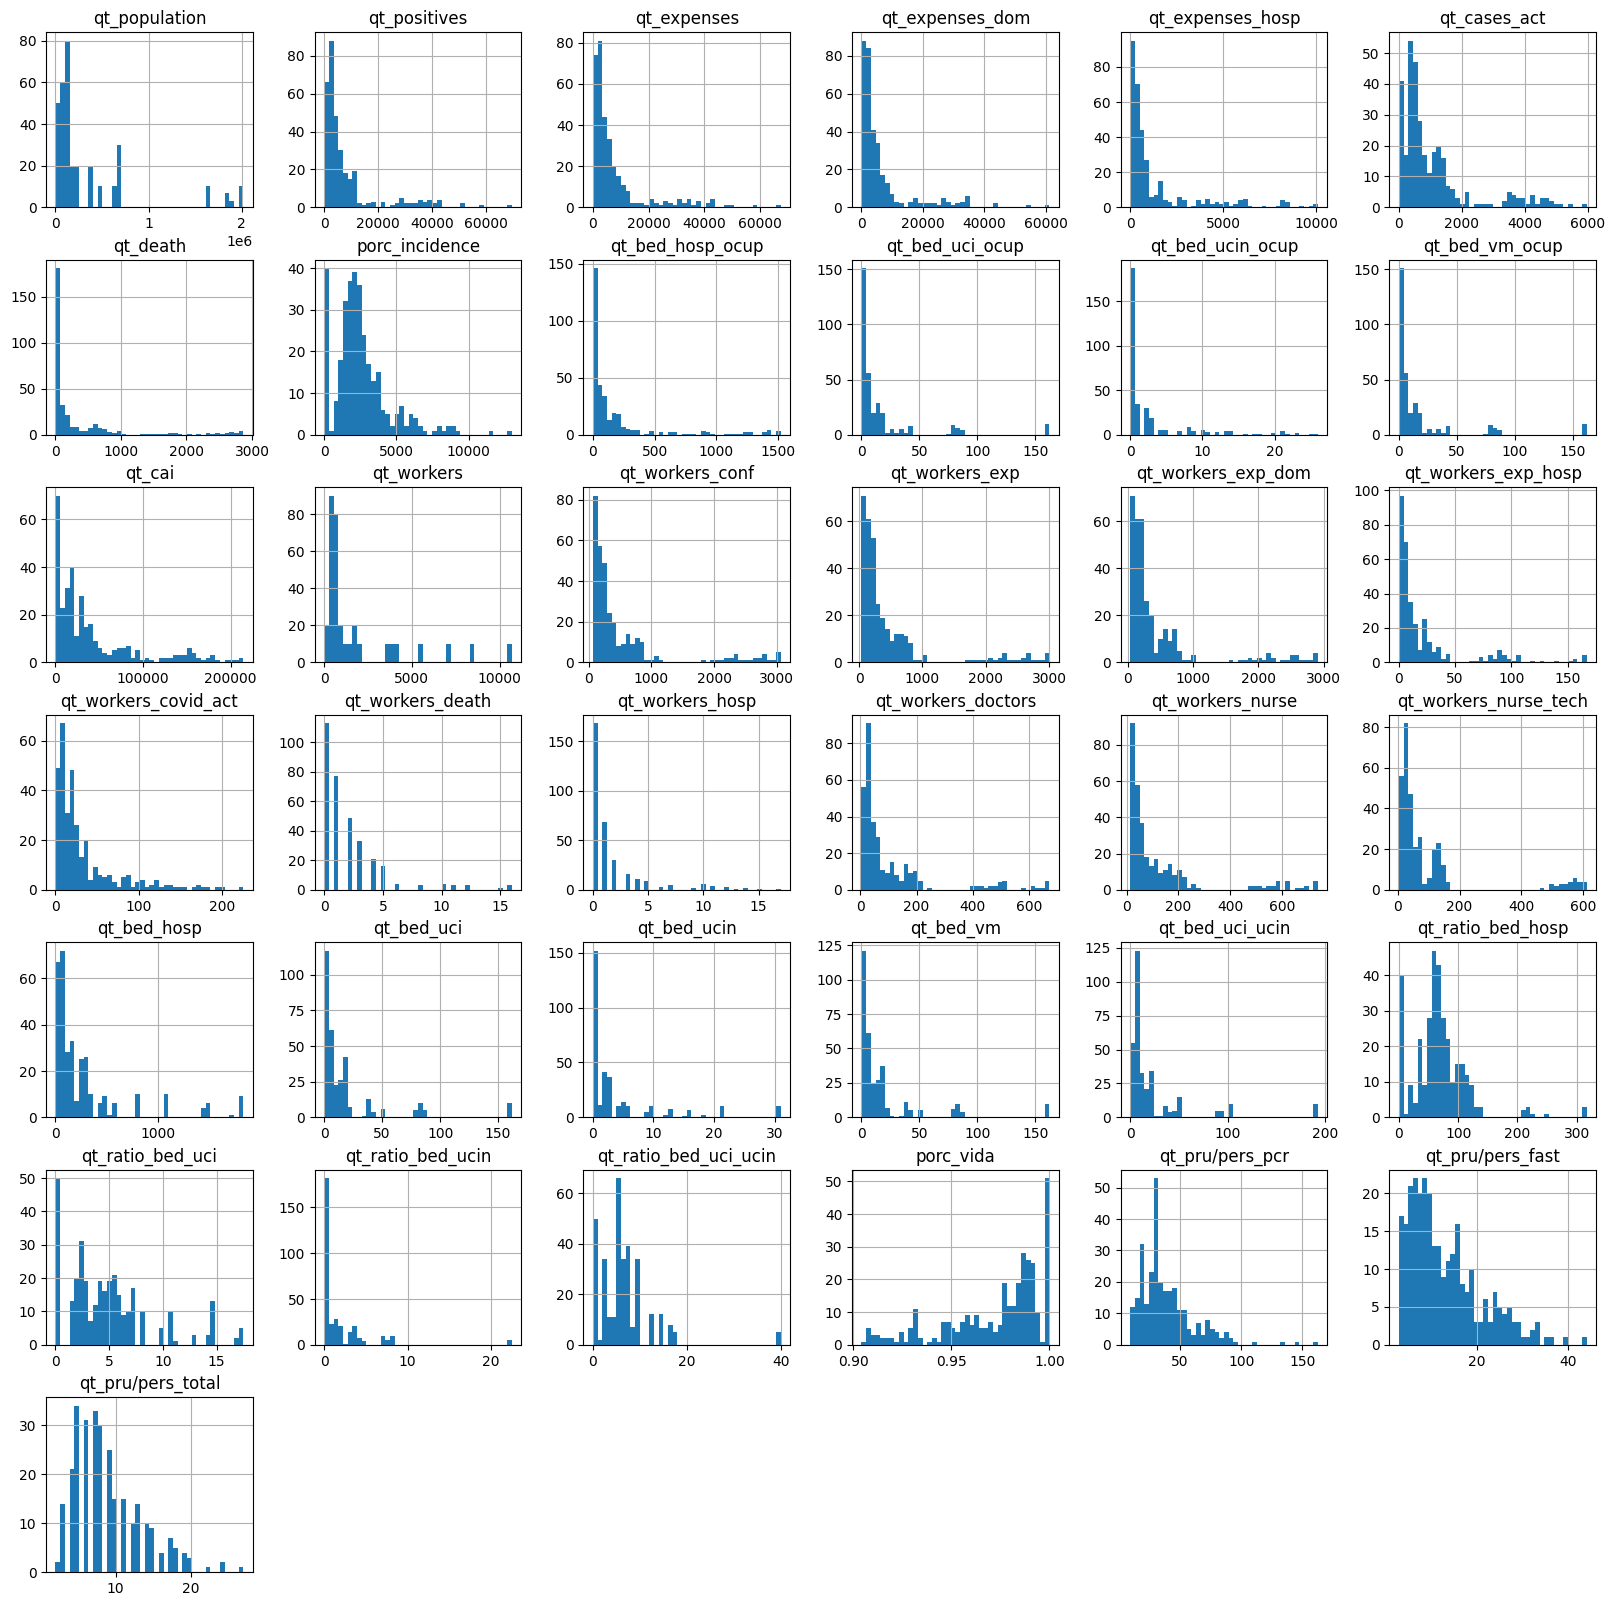

In [65]:
import matplotlib.pyplot as plt

#VER DISTRIBUCION DE LAS VARIABLES
llenado.hist(bins=40, figsize=(20,20))
plt.show()


In [68]:
missing_values_count = llenado.isnull().sum() 
print(missing_values_count)


qt_population             0
qt_positives              0
qt_expenses               0
qt_expenses_dom           0
qt_expenses_hosp          0
qt_cases_act              0
qt_death                  0
porc_incidence            0
qt_bed_hosp_ocup          0
qt_bed_uci_ocup           0
qt_bed_ucin_ocup          0
qt_bed_vm_ocup            0
qt_cai                    0
qt_workers                0
qt_workers_conf           0
qt_workers_exp            0
qt_workers_exp_dom        0
qt_workers_exp_hosp       0
qt_workers_covid_act      0
qt_workers_death          0
qt_workers_hosp           0
qt_workers_doctors        0
qt_workers_nurse          0
qt_workers_nurse_tech     0
qt_bed_hosp               0
qt_bed_uci                0
qt_bed_ucin               0
qt_bed_vm                 0
qt_bed_uci_ucin           0
qt_ratio_bed_hosp         0
qt_ratio_bed_uci          0
qt_ratio_bed_ucin         0
qt_ratio_bed_uci_ucin     0
porc_vida                 0
qt_pru/pers_pcr          40
qt_pru/pers_fast    

Text(0.5, 1.0, 'qt_death')

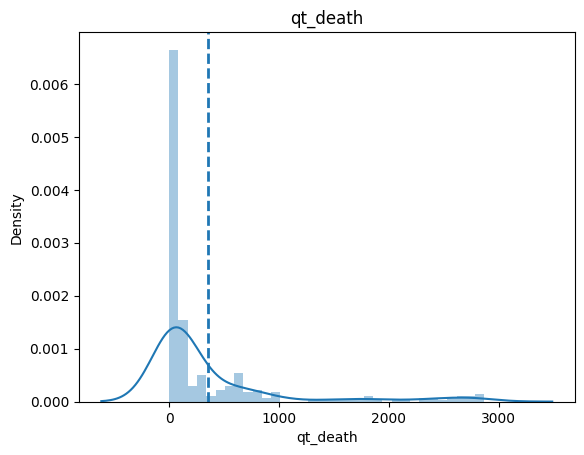

In [66]:
import seaborn as sns 
#VER DISTRIBUCION DE LA VARIABLE OBJETIVO
ax=sns.distplot(llenado["qt_death"])
ax.axvline(llenado["qt_death"].mean(), linestyle='--', linewidth=2)
plt.title('qt_death')

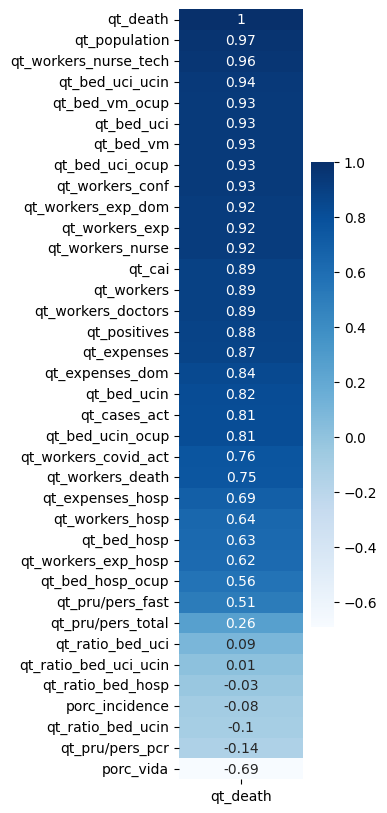

In [67]:
import numpy as np
#VER CORRELACIÓN ENTRE VARIABLES
correlacion = llenado
#mask = np.triu(np.ones_like(llenado.corr()))

correlacion=correlacion.corr().round(2)
correlacion = correlacion.loc[:,['qt_death']]
correlacion = correlacion.sort_values(by='qt_death', ascending=False)
fig, ax = plt.subplots(figsize=(2,10))
ax=sns.heatmap(correlacion, annot=True,cmap="Blues")